 ## ML-Project
 - **Author**: 
     - Souheil Maatoug
     - Hugues Delattre
     - Ricardo Requena Delon
     - Yulu Wang
     - Laurence James
 
 
### Description:
- Based on real user experience information about books (title, author, year, ...), the purpose of this project is to develop an end-to-end machine learning project to <mark>**predict a book's rating**</mark>.
 
- This notebook presents an exploration of the available dataset with some analytics.

- **Problem**: can we predict a book's rating using the goodreads database ?

### Data
- The available dataset is a collection of user experience information taken from the social cataloging website [Goodreads](https://www.goodreads.com). The size of the dataset is about 10k lines which is considered as sufficient for an ML project.

- The information in the dataset are : *bookID, title, authors, average_rating, isbn, isbn13, language_code, num_pages, ratings_count, text_reviews_count, publication_date, publisher*
 
- Optional additional dataset: If needed, we can access an additional database from the same source (Goodreads) and that contains additional information (Genres, Reviews, ...).

- do we have enough data to solve the problem ?
- can we get more data ? 
- is my data sane (is it of good quality ? / is it representative to problem ?)
 
 

---



 ### ML project steps


| data                         | features                     | model                        |
|------------------------------|------------------------------|------------------------------|
|- cleaning                    |- feature selection           |- model selection             |
|- transformation              |- feature engineering         |- evaluation                  |
|- plotting                    |                              |- improvement                 |

### Contents of the noteook
1. Getting to know the data  
    - opening the csv file and checking for anomalies in the structure of the file
    - fixing errors and writing new csv file if needed
2. Exploring the data 
    - checking for missing values
    - checking for erroneous values
    - checking for duplicates
    - analyzing each column of the csv
3. Conclusions (about features and modelling)

## 1. Getting to know the data

In [1]:
# read the csv file
# headers / column names
with open("../dataset/books.csv", "r", encoding="utf-8") as f:
    header_line = f.readline()
    header_list = [item.strip() for item in header_line.rstrip("\n").split(",")]

In [2]:
print(len(header_list), "columns: ")
print(header_list)

12 columns: 
['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', 'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date', 'publisher']


- **bookID**: a unique identifier in the csv file
- **title**: the title of the book
- **authors**: the authors of the book
- **average_rating**: the average rating having a value between 1 and 5
- **isbn**: the isbn code (unique identifier) of the book
- **isbn13** : a 13 digit isbn code
- **language_code**: the language of the code
- **num_pages**: the number of pages of the book
- **rating_count**: the count of ratings of the book
- **text_reviews_count**: the count of reviews of the book
- **publication_date**: the date of publication of the book
- **publisher**: the name of the publisher

In [3]:
# check for incorrect structure in the dataset file
with open("../dataset/books.csv", "r", encoding="utf-8") as f:
    for line in f:
        line_list = line.rstrip("\n").split(",") 
        if len(line_list) != len(header_list):
            print(len(line_list), "columns")
            print(line_list, "\n")        

13 columns
['12224', 'Streetcar Suburbs: The Process of Growth in Boston  1870-1900', 'Sam Bass Warner', ' Jr./Sam B. Warner', '3.58', '0674842111', '9780674842113', 'en-US', '236', '61', '6', '4/20/2004', 'Harvard University Press'] 

13 columns
['16914', "The Tolkien Fan's Medieval Reader", 'David E. Smith (Turgon of TheOneRing.net', ' one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith)', '3.58', '1593600119', '9781593600112', 'eng', '400', '26', '4', '4/6/2004', 'Cold Spring Press'] 

13 columns
['22128', 'Patriots (The Coming Collapse)', 'James Wesley', ' Rawles', '3.63', '156384155X', '9781563841552', 'eng', '342', '38', '4', '1/15/1999', 'Huntington House Publishers'] 

13 columns
['34889', "Brown's Star Atlas: Showing All The Bright Stars With Full Instructions How To Find And Use Them For Navigational Purposes And Department Of Trade Examinations.", 'Brown', ' Son & Ferguson', '0.00', '0851742718', '9780851742717', 'eng', '49', '0', '0',

We fin that 4 lines of the dataset file have an incorrect structure (13 columns instead of 12) due to a comma separator that was used inside a field. After checking those books on Goodreads website, we can replace manually those information and fix the errors as follows:

- line 3350: the name of the author is duplicated: Sam Bass Warner and Jr./Sam B. Warner. The correct name is `Jr./Sam B. Warner`
- line 4704: the authors are `David E. Smith (Turgon of TheOneRing.net, one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith)`. We can replace that by: `David E. Smith/Verlyn Flieger`
- line 5879: the authors are `James Wesley, Rawles`. We can replace that by `James Wesley/Rawles`
- line 8981: the authors are `Brown, Son & Ferguson`. We can replace that by `Brown/Son & Ferguson`

- A new csv file `books_clean.csv` was saved manually in the same directory as the original one
- If the dataset would need changes that couldn't be done manually, a program has been written "**normalize-data.py**"

## 2. Exploring the data 
In this section, we will explore every column of the csv file. We will check for any defaults but also every column will be analyzed to understand its implication in the target output (the average rating of a book) 

In [4]:
import pandas as pd

In [5]:
books_df = pd.read_csv("../dataset/books_clean.csv", sep=",", encoding="utf-8")
books_df.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


In [6]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   title               11127 non-null  object 
 2   authors             11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7     num_pages         11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


- No null values

In [7]:
books_df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [8]:
print("finding duplicates: \n")
for col_value in books_df.columns:
    print(col_value, ": ", books_df[col_value].duplicated().any())

finding duplicates: 

bookID :  False
title :  True
authors :  True
average_rating :  True
isbn :  False
isbn13 :  False
language_code :  True
  num_pages :  True
ratings_count :  True
text_reviews_count :  True
publication_date :  True
publisher :  True


#### Comments
- `title` have long string of characters and is not systematically unique
- `authors` can be a single name or multiple names separated by a "/" (to be verified)
- `average_rating` this is the target attribute. It's values must be between 1 and 5 but we see that the min value is 0
- `isbn` and `isbn13` are unique 
- `language_code` is a categorical value
- `num_pages`: should be strictly positive but the min value is 0
- `ratings_count` is the count of ratings the min value is 0. does-it correspond to non rated books ?
- `text_reviews_count` text reviews are different from ratings. normally it is mandatory to add a rating if one wans to add a text review. (text_reviews_count <= ratings_count ??)
- `publisher` is the name of the publisher, sometimes we can find a small alteration like `Scholastic` and `Scholastic inc.`

### 1-Titles

In [9]:
books_df["title"].to_list()[:15]

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)',
 'Unauthorized Harry Potter Book Seven News: "Half-Blood Prince" Analysis and Speculation',
 'Harry Potter Collection (Harry Potter  #1-6)',
 "The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story (Hitchhiker's Guide to the Galaxy  #1-5)",
 "The Ultimate Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1-5)",
 "The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1)",
 "The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy  #1)",
 "The Ultimate Hitchhiker's Guide (Hitchhiker's Guide to the Galaxy  #1-5)",
 'A Short History of Nearly Everything',
 "Bill Bryson's African Diary",
 "Bryson's Dictionary of Trouble

- The `title` column contains the titles of books
- It is a text and can have an alpha numerical values (such the edition of a book) or some indications between parentheses.
- the column represents an important information in the dataset, especially for finding duplicates or different editions of a same book
- a-priori, the raw text cannot be used as a feature in the model but one can use an external NLP library like [spaCy](https://spacy.io/) in order to extract keywords from the title to be used as a feature.

### 2- Authors

In [10]:
books_df["authors"].to_list()[:15]

['J.K. Rowling/Mary GrandPré',
 'J.K. Rowling/Mary GrandPré',
 'J.K. Rowling',
 'J.K. Rowling/Mary GrandPré',
 'J.K. Rowling/Mary GrandPré',
 'W. Frederick Zimmerman',
 'J.K. Rowling',
 'Douglas Adams',
 'Douglas Adams',
 'Douglas Adams',
 'Douglas Adams/Stephen Fry',
 'Douglas Adams',
 'Bill Bryson',
 'Bill Bryson',
 'Bill Bryson']

- The `authors` column contains the name(s) of the author(s) of a book
- It contains duplicates but it might have some mistypings. We have to do some preprocessing (removing additional spaces and indententions).
- Multiple authors are separed by a `/`

In [11]:
# get the authors column
authors_df = books_df[["authors"]]

In [12]:
# remove additional whitespaces and indentations from the authors column
authors_df.loc[:, "authors_preprocess"] = authors_df["authors"].apply(lambda x: " ".join(x.lower().split()))

C:\Users\hdela\AppData\Local\Temp\ipykernel_14348\1119710642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors_df.loc[:, "authors_preprocess"] = authors_df["authors"].apply(lambda x: " ".join(x.lower().split()))


In [13]:
# create a new column  number of authors that counts the number of authors per book
authors_df.loc[:, "number of authors"] = authors_df["authors_preprocess"].str.count("/").values + 1

C:\Users\hdela\AppData\Local\Temp\ipykernel_14348\1973461537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  authors_df.loc[:, "number of authors"] = authors_df["authors_preprocess"].str.count("/").values + 1


In [14]:
authors_df.head()

,authors,authors_preprocess,number of authors
0,J.K. Rowling/Mary GrandPré,j.k. rowling/mary grandpré,2
1,J.K. Rowling/Mary GrandPré,j.k. rowling/mary grandpré,2
2,J.K. Rowling,j.k. rowling,1
3,J.K. Rowling/Mary GrandPré,j.k. rowling/mary grandpré,2
4,J.K. Rowling/Mary GrandPré,j.k. rowling/mary grandpré,2


<Axes: title={'center': 'distribution of the books according to the number of authors'}, ylabel='percentage (%) of the dataset'>

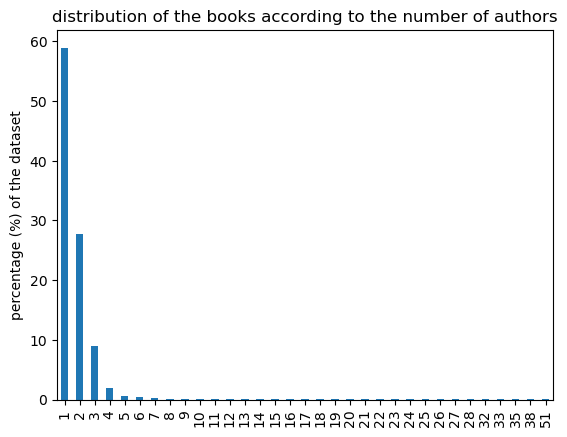

In [15]:
# see the number of authors of the books of the dataset
authors_df["number of authors"].value_counts(
    sort=False, normalize=True
).mul(100).sort_index().plot.bar(ylabel="percentage (%) of the dataset", title="distribution of the books according to the number of authors")

#### Observations
- we can see that 60% of the books of the dataset are written by a single author, 30% by 2 authors and near 10% for 3 authors.
- In case we want to use the `authors` column as a feature, we have the following possibilities:
    - encode the author column as a raw text (doesn't make much sens)
    - pick the first author even for multiple authors book and make an ordinal encoding
    - pick the 3 first authors and make a one-hot encoding  

- but let's see if this information is good or not, let's see the number of occurrences of each author. 
If the number is low then this column cannot be pertinent and it doesn't make sens to use it. Plus, for the case of a prediction of a book where the author is not in the training set. what will happen ?

In [16]:
# get the list of all authors of the dataset
authors_list = []
for i in range(len(authors_df)):
    if authors_df.loc[i, "number of authors"] == 1:
        authors_list.append(authors_df.loc[i, "authors_preprocess"])
    else:
        authors_list.extend(authors_df.loc[i, "authors_preprocess"].split("/"))


In [17]:
# create a new dataframe with the list of all authors
authors_list_df = pd.DataFrame({"name": authors_list})  

In [18]:
print("The number of distinct authors in the dataset is :", len(authors_list_df["name"].unique()))

The number of distinct authors in the dataset is : 9207


!!! 9207 authors in dataset. This number is too large to be used in a one-hot encoding process. (imagine 9207 additional columns in the dataset).

In [19]:
# let's count the number of occurrences of the authors
author_counts = authors_list_df.value_counts(sort=True)
print(author_counts)

name               
stephen king           99
william shakespeare    93
j.r.r. tolkien         55
sandra brown           48
p.g. wodehouse         47
                       ..
jack weatherford        1
jack nimersheim         1
jack meadows            1
jack lane               1
趙丕慧                     1
Length: 9207, dtype: int64


The results above show the number of occurrences of the list of authors in the dataset. We see that a mixmum occurrences is 99 times which can be explained by different books or different editions as well as collaborative books.

<Axes: title={'center': 'distribution of author occurrences in the dataset'}, ylabel='Frequency'>

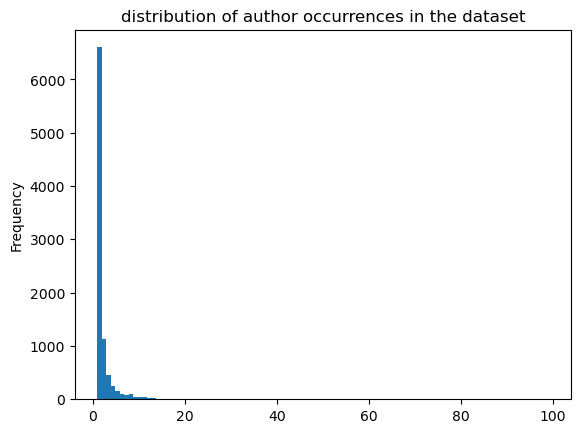

In [20]:
author_counts.plot.hist(
    bins=100, 
    title="distribution of author occurrences in the dataset",
    xlabel="number of occurrences"
)

In [21]:
author_counts.value_counts(sort=True) / author_counts.value_counts().sum() * 100

1     71.706310
2     12.349299
3      4.941892
4      2.715325
5      1.726947
6      1.151298
8      1.010101
7      0.934072
9      0.510481
10     0.477897
11     0.401868
13     0.304116
12     0.195503
15     0.152058
19     0.152058
14     0.152058
17     0.141197
16     0.130336
21     0.108613
18     0.076029
22     0.065168
20     0.065168
26     0.054307
28     0.054307
25     0.043445
27     0.043445
29     0.032584
31     0.032584
33     0.032584
23     0.021723
24     0.021723
35     0.021723
43     0.021723
47     0.021723
93     0.010861
30     0.010861
34     0.010861
37     0.010861
38     0.010861
39     0.010861
40     0.010861
44     0.010861
46     0.010861
48     0.010861
55     0.010861
99     0.010861
dtype: float64

- we observe that 71% of the authors appear only one time in the database. Only few authors appear multiple times. This means that the column "authors" mostly contains distinct values (author names) and then cannot be used as a feature or else it will create an important biais.

In [22]:
num_authors=authors_df["number of authors"]
books_df=books_df.join(num_authors)


<Axes: xlabel='number of authors', ylabel='average_rating'>

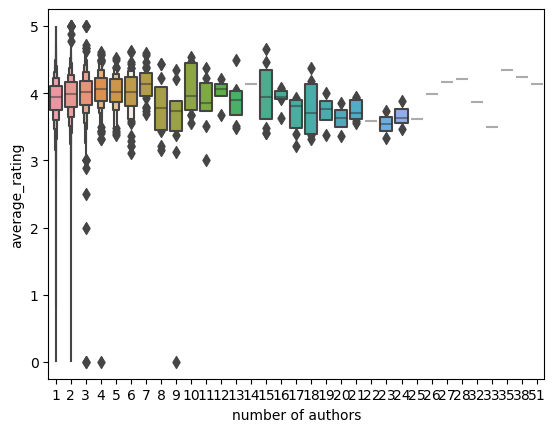

In [23]:
import seaborn as sns
sns.boxenplot(data=books_df, x="number of authors", y="average_rating")

Although the Author's column isn't usable as it is, we can distinguish some variations in the average rating from the number of authors cited
We could keep this information later if we clean it up a bit (maybe remove the books with number of authors > 20)

### 2. publisher
- A publisher can appear many times for different books. Let's see the distribution of publisher names

In [24]:
# get the column publisher
publisher_df = books_df[["publisher"]]
# remove additional whitespaces and indentations from the publisher column
publisher_df.loc[:, "publisher_preprocess"] = publisher_df["publisher"].apply(lambda x: " ".join(x.lower().split()))

C:\Users\hdela\AppData\Local\Temp\ipykernel_14348\3590932602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publisher_df.loc[:, "publisher_preprocess"] = publisher_df["publisher"].apply(lambda x: " ".join(x.lower().split()))


In [25]:
publisher_df[["publisher_preprocess"]].value_counts()

publisher_preprocess
vintage                 318
penguin books           261
penguin classics        184
mariner books           150
ballantine books        145
                       ... 
night shade               1
nicholas brealey          1
distribooks               1
newmarket                 1
liguori publications      1
Length: 2255, dtype: int64

<Axes: title={'center': 'number of occurrences of publishers'}, xlabel='publisher_preprocess', ylabel='frequency'>

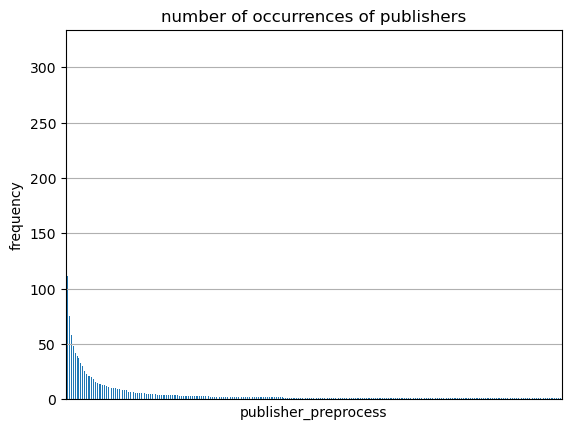

In [26]:
publisher_df[["publisher_preprocess"]].value_counts().plot(
    kind="bar", xticks=[], title="number of occurrences of publishers", ylabel="frequency", grid=True)

<Axes: title={'center': 'distribution of publisher occurrences in the dataset'}, xlabel='number of occurrences', ylabel='frequency'>

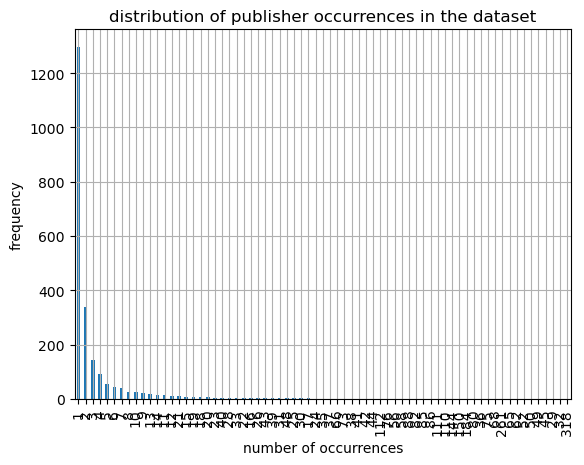

In [27]:
publisher_df.value_counts().value_counts().plot.bar(
    title="distribution of publisher occurrences in the dataset",
    ylabel="frequency",
    xlabel="number of occurrences",
    grid=True
)

We can observe that the majority of the dataset is composed of publishers used only one time in the database. 
This means that the dataset contains principally distinct publisher names and then it cannot be used as a feature, adding that the database is unbalanced (in term of occurrences).

### 3. Average rating
this is the **target value**

- An important information to have is that ratings in goodreads website can only be between 1 and 5.
- What about books having rating 0 or less than  1? is it a default value for unrated books ?

In [28]:
books_df["average_rating"].describe()

count    11127.000000
mean         3.933631
std          0.352445
min          0.000000
25%          3.770000
50%          3.960000
75%          4.135000
max          5.000000
Name: average_rating, dtype: float64

In [29]:
# let's see the rows that have rating less than 1
books_df.loc[books_df["average_rating"] < 1]["average_rating"]

265      0.0
375      0.0
987      0.0
2532     0.0
2533     0.0
2758     0.0
3493     0.0
4242     0.0
4678     0.0
5325     0.0
6383     0.0
6561     0.0
6862     0.0
6880     0.0
7147     0.0
7402     0.0
7576     0.0
7637     0.0
7800     0.0
8979     0.0
9335     0.0
9441     0.0
10142    0.0
10501    0.0
10921    0.0
11031    0.0
Name: average_rating, dtype: float64

In [30]:
len(books_df.loc[books_df["average_rating"] < 1]["average_rating"])

26

- We can see that 26 rows have a rating value less than 1.
- the value < 1 are only 0 values. This means that it most likely is a default value for yet unrated books. 

In [31]:
# let's look at their full rows
books_df.loc[books_df["average_rating"]==0]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number of authors
265,799,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,1740592050,9781740592055,eng,295,0,0,9/1/2001,Lonely Planet,2
375,1302,Juiced Official Strategy Guide,Doug Walsh,0.0,0744005612,9780744005615,eng,112,0,0,6/1/2005,BradyGames,1
987,3351,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,189044717X,9781890447175,eng,200,0,0,10/13/2000,Grove Press Open City Books,9
2532,9337,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,1932206108,9781932206104,eng,228,0,0,1/1/2004,Frederick P. Lenz Foundation for American Budd...,1
2533,9338,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,1932206086,9781932206081,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...,1
2758,10200,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,8644101277,9788644101277,srp,222,0,0,1/1/1996,"Izdavačka agencija ""Draganić""",1
3493,12712,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,0333581296,9780333581292,eng,71,0,0,8/20/1992,Macmillan,1
4242,15186,American Film Guide,Frank N. Magill,0.0,0893562505,9780893562502,eng,5,0,0,1/1/1983,Salem Press Inc,1
4678,16806,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,0415940478,9780415940474,eng,386,0,0,11/8/2002,Routledge,1
5325,19257,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,0916724948,9780916724948,eng,63,0,0,12/31/1997,Arts Publications,4


- We can observe that for a rating of 0, the value of `ratings_count` is also equal to 0. This can confirm the hypothesis of a rating of 0 is a default value for non rated books.
- The same is also observed in the column `text_reviews_count` where the values are all equal to 0 except for only one row which can be a typing error or a copying error..
- As a conclusion of this, we say that we can drop those lines because they correspond to books not rated yet and cannot be  used to train a predicting model.

In [32]:
# drop rating 0 rows
books_df = books_df[books_df["average_rating"] > 0]

- This leads us to another reflexion which is: can a book have an average_rating non null with 0 rating_counts ?
- can we find rows with `ratings_count` equal to 0 and `average_rating` not 0 ?

In [33]:
len(books_df.loc[(books_df["ratings_count"]==0) & (books_df["average_rating"] > 0)])

55

there is 55 rows containing such erroneous values

In [34]:
books_df.loc[(books_df["ratings_count"]==0) & (books_df["average_rating"] > 0)]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number of authors
264,797,Lonely Planet Londres,Lonely Planet/Sarah Johnstone/Tom Masters,4.03,8408064762,9788408064763,spa,480,0,0,5/1/2006,Geoplaneta,3
525,1658,American Government: Continuity and Change Al...,Karen O'Connor/Larry J. Sabato,2.83,0321317106,9780321317100,eng,664,0,0,3/11/2005,Longman Publishing Group,2
526,1664,Essentials of American and Texas Government: C...,Karen O'Connor/Larry J. Sabato,3.50,0321365208,9780321365200,eng,854,0,0,7/29/2005,Longman Publishing Group,2
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.00,0198145047,9780198145042,grc,364,0,0,2/22/1922,Oxford University Press USA,3
747,2411,Melville and the politics of identity: From *K...,Julian Markels,3.33,0252063023,9780252063022,eng,164,0,0,7/1/1993,University of Illinois Press,1
935,3084,April May und June,Elizabeth von Arnim,3.88,345833422X,9783458334224,ger,88,0,0,4/1/1995,Insel Frankfurt,1
1110,3754,Dr No / Moonraker / Thunderball / From Russia ...,Ian Fleming,3.98,0862731585,9780862731588,eng,862,0,0,1/1/1984,Heinemann-Octopus,1
1681,5863,V.S. Naipaul,Bruce Alvin King,2.00,1403904561,9781403904560,eng,240,0,0,10/10/2003,Palgrave Macmillan,1
2051,7400,The Baby Emergency (Tennengarrah Clinic #1),Carol Marinelli,3.60,0263181499,9780263181494,eng,285,0,0,6/1/2004,Mills & Boon,1
2255,8077,Animales No Se Visten Los (Animals Should Def...,Judi Barrett/Ron Barrett,4.11,1595191356,9781595191359,eng,32,0,0,10/30/1991,Live Oak Media,2


- there is 55 lines where the average rating is not null but the number of ratings is null. 
- It is obviously an error of typing or of web scraping (seen the origin the csv file).


- This error can be handled in different ways:
    - use an API in order to read updated data from the goodreads website and get the correct number of ratings per book. (not secure because the goodreads API is no more supported and the use of unofficial repositories online can lead to other erroneous data)
    - drop those lines (secure way but reducing the dataset size)
    - fill by the mean value of similar books (similar can be defined by books having similar average rating)

#### Another observation
- About books having average_rating non zero and ratings_count equal to zero:

at first view, we observe that in  most cases, duplicate titles correspond to different editions of a same book (even audio versions sometimes). we observe that the average rating value is taken from one book that has been rated and pasted to all editions. That's what explains why the average_rating is not 0 while the ratings_count is 0.

In other words, different editions of a same book have all the average rating even if they were not been rated.

- In this case, should we keep those rows ??

- If we keep those rows and replace the ratings_count by the values of the book that has been really rated, then we will have something similar to duplicate values. Different editions of a book will often all have the same average_rating with the same ratings_count. 

- Since 55 rows doesn't affect too much the dataset (11 127 rows), the secure decision is to drop those rows

In [35]:
# drop lines
books_df = books_df[~((books_df["ratings_count"]==0) & (books_df["average_rating"] > 0))]

#### What about duplicate titles (different editions) ? do they have the same average rate ? 

In [36]:
books_df.loc[books_df["title"].duplicated(keep=False)].sort_values(axis=0, by="title")

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number of authors
9253,36303,'Salem's Lot,Stephen King,4.02,0451139690,9780451139696,eng,427,186,22,8/1/1976,Signet,1
1577,5420,'Salem's Lot,Stephen King,4.02,0340770538,9780340770535,eng,586,25,6,10/6/2010,Hodder & Stoughton Ltd,1
5302,19137,'Salem's Lot,Stephen King,4.02,0451098277,9780451098276,eng,817,18,3,8/1/1976,Signet,1
5300,19135,'Salem's Lot,Stephen King/Ron McLarty,4.02,0743536959,9780743536950,en-US,0,56,5,1/19/2004,Simon & Schuster Audio,2
1576,5419,'Salem's Lot,Stephen King,4.02,0451092317,9780451092311,en-US,427,178,35,11/13/1979,Signet,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10908,44597,Wide Sargasso Sea,Jean Rhys,3.58,0140274219,9780140274219,eng,160,21384,1386,9/3/1998,Penguin Books,1
568,1848,Wild Swans: Three Daughters of China,Jung Chang,4.26,0743246985,9780743246989,eng,562,73572,4280,8/12/2003,Simon Schuster,1
2656,9763,Wild Swans: Three Daughters of China,Jung Chang,4.26,0007176155,9780007176151,eng,666,1832,214,4/5/2004,Harper Perennial,1
3492,12703,Wuthering Heights,Emily Brontë/Alice Hoffman,3.85,0451529251,9780451529251,eng,322,1898,201,3/2/2004,Signet Classics,2


- We observe also that different editions have often the same average_rating even with different ratings_count. 
- This means that it can be an error of web scraping
- We observe that the number of such rows is really important. There is a lot of different editions in this dataset. We will just leave them

#### How is the distribution of average rating and the rating count ?

<Axes: title={'center': 'distribution average_rating / ratings_count'}, xlabel='average_rating', ylabel='ratings_count'>

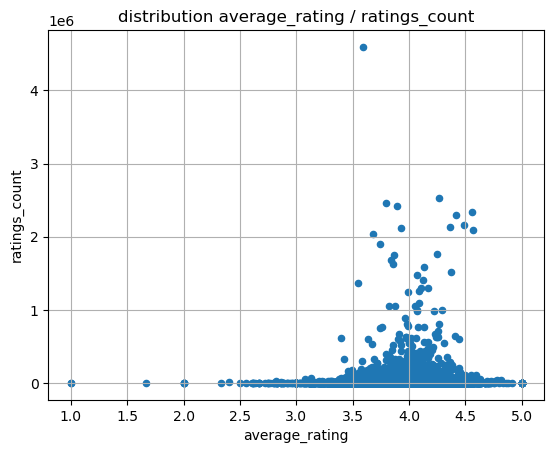

In [37]:
books_df.plot.scatter(
    y="ratings_count", 
    x="average_rating", 
    grid=True,
    title="distribution average_rating / ratings_count"
)

- At first sight, we see that most average_rating are centered on the value 4 (a histogram can confirm that)
- ratings_count can go from very few to more than 4 000 000 ratings
- let's first take a look at those values in order to find outliers

<Axes: title={'center': 'distribution of the average_rating values'}, ylabel='Frequency'>

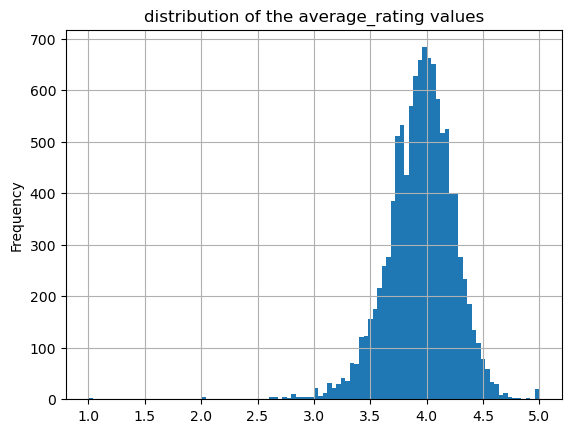

In [38]:
books_df["average_rating"].plot.hist(
    bins=100, 
    title="distribution of the average_rating values", 
    xlabel="average_rating",
    grid=True
)

- Looks like a normal distribution centered around 4.
- We see that values are now only between 1 and 5
- very few books have low ratings (less than 3)
- very few books can have 5 stars rating

<Axes: >

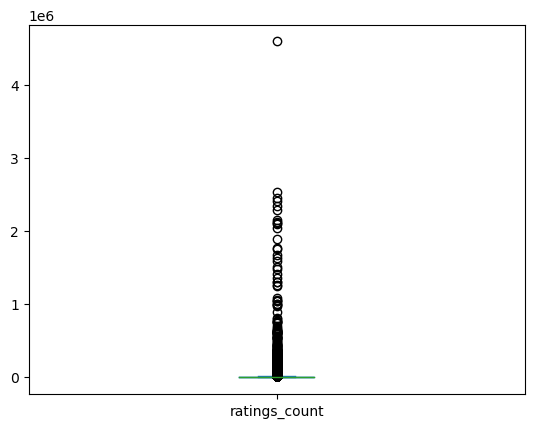

In [39]:
books_df["ratings_count"].plot.box()

In [40]:
books_df.loc[books_df["ratings_count"] > 4e6]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number of authors
10340,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,0316015849,9780316015844,eng,501,4597666,94265,9/6/2006,Little Brown and Company,1


- looks like it's normal to find very high level of counts for some special books like the one above

<Axes: >

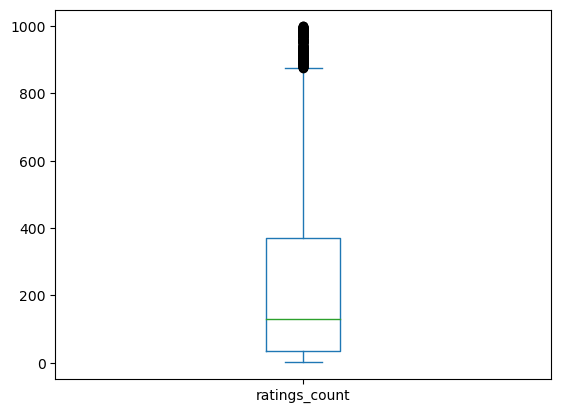

In [41]:
books_df.loc[books_df["ratings_count"] < 1e3, "ratings_count"].plot.box()

for the majority of the dataset, we find tha ratings_counts are between less than 10 to 1000

In [42]:
books_df_sliced = books_df.loc[books_df["ratings_count"] < 1e3]

<Axes: title={'center': 'distribution average_rating / ratings_count'}, xlabel='average_rating', ylabel='ratings_count'>

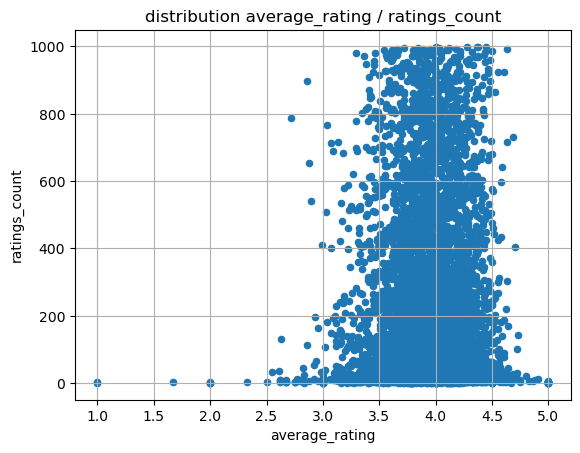

In [43]:
books_df_sliced.plot.scatter(
    y="ratings_count", 
    x="average_rating", 
    grid=True,
    title="distribution average_rating / ratings_count"
)

- We can see that almost all ratings are centered around 4 but we can surely say that above a certain ratings_count (200) the average_rating is more than 2.5 or 3

### text review counts

<Axes: title={'center': 'distribution average_rating / ratings_count'}, xlabel='average_rating', ylabel='text_reviews_count'>

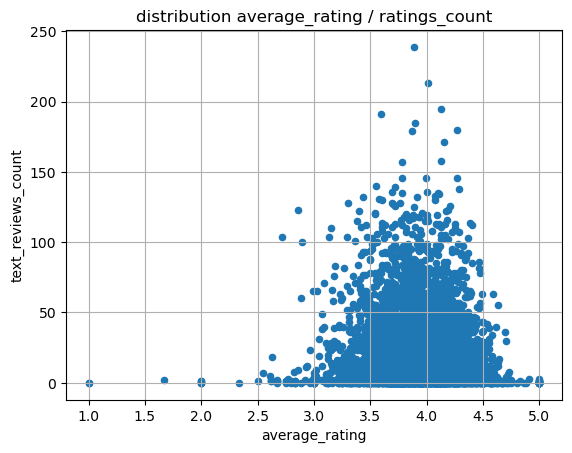

In [44]:
books_df_sliced.plot.scatter(
    y="text_reviews_count", 
    x="average_rating", 
    grid=True,
    title="distribution average_rating / ratings_count"
)

- The values are >= to 1
- We see a normal distribution also around 4

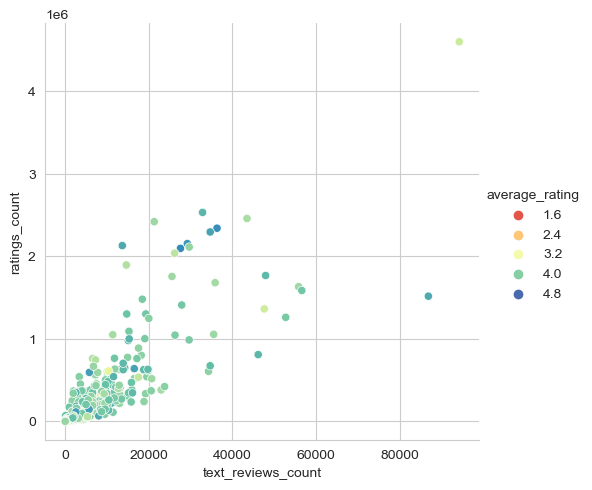

In [45]:
import seaborn as sns

sns.set_style("whitegrid")
sns.relplot(data=books_df, x="text_reviews_count", y="ratings_count", hue="average_rating", palette="Spectral")

- It seems like there is a linear relation between `ratings_count` and `text_reviews_count`. although we cannot confirm any linear relation between each of them and the average_rating

### language code
- Categorical feature
- plot their distributions

In [46]:
books_df["language_code"].value_counts()

eng      8847
en-US    1409
en-GB     214
spa       212
fre       140
ger        96
jpn        45
mul        19
zho        14
por        10
grc         9
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: language_code, dtype: int64

<Axes: title={'center': 'distribution average_rating / ratings_count'}, xlabel='text_reviews_count', ylabel='ratings_count'>

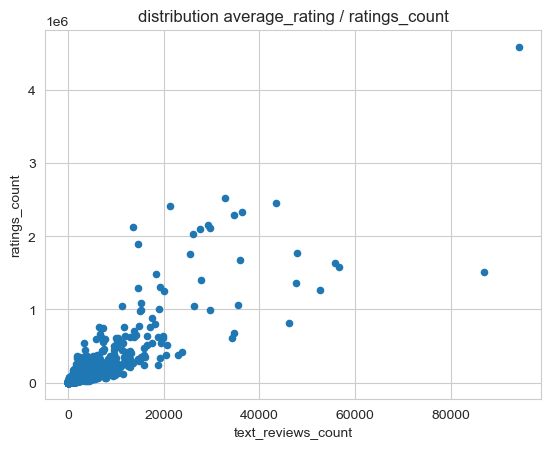

In [47]:
books_df.plot.scatter(
    y="ratings_count", 
    x="text_reviews_count", 
    grid=True,
    title="distribution average_rating / ratings_count"
)

<Axes: title={'center': 'distribution of the language_code column'}>

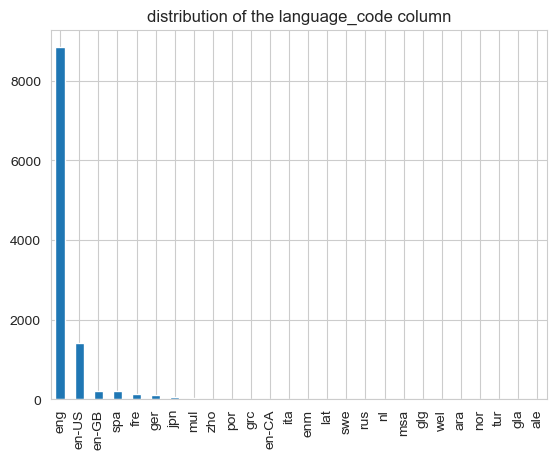

In [48]:
books_df["language_code"].value_counts().plot.bar(grid=True, title="distribution of the language_code column")

- `language_code` is an unbalanced column
- some languages have only one book in the dataset.
- shall we keep this feature ? 
- does a book have a good rating because it is written in a certain language ?

In [49]:
import seaborn as sns

<Axes: xlabel='average_rating', ylabel='language_code'>

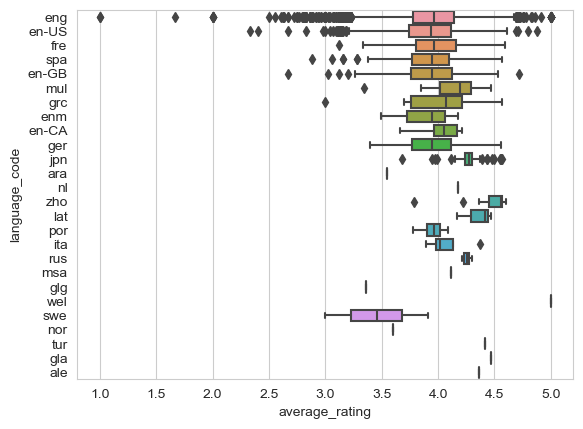

In [50]:
sns.boxplot(data=books_df, x="average_rating", y="language_code")

- we can see that for the most used language codes (`eng`, `eng-US` and `eng-GB`) the average rating is normally distributed like it was seen for the whole dataset
- for some language codes we find that the average rating can be more centered and bounded but this observation cannot be used to build a generic model. We only have few samples for thoses languages and it cannot be representative of the rating problem.
- In other words, the feature language can be dropped

### 4. Publication date

In [51]:
##lambda function to get year manually
def get_datetime_year(input_date):
    """extract the year from publication date column"""
    date_exploded = input_date.split("/")
    return date_exploded[-1]

books_df["publication_date"].apply(get_datetime_year)

0        2006
1        2004
2        2003
3        2004
4        2004
         ... 
11122    2004
11123    1988
11124    1993
11125    2007
11126    2006
Name: publication_date, Length: 11046, dtype: object

In [52]:
books_df["publication_date"]

0         9/16/2006
1          9/1/2004
2         11/1/2003
3          5/1/2004
4         9/13/2004
            ...    
11122    12/21/2004
11123     12/1/1988
11124      8/1/1993
11125     2/27/2007
11126     5/28/2006
Name: publication_date, Length: 11046, dtype: object

In [53]:
#pd.to_datetime(books_df["publication_date"]).df.strftime('%m/%d/%Y')
#books_df["publication_date"].apply(lambda x: pd.striptime(x,'%m/%d/%y'))
#pd.to_datetime(books_df["publication_date"],exact=False)
pd.to_datetime(books_df["publication_date"], format="%m/%d/%Y", errors="coerce")

0       2006-09-16
1       2004-09-01
2       2003-11-01
3       2004-05-01
4       2004-09-13
           ...    
11122   2004-12-21
11123   1988-12-01
11124   1993-08-01
11125   2007-02-27
11126   2006-05-28
Name: publication_date, Length: 11046, dtype: datetime64[ns]

In [54]:
books_df["publication_correct"] = pd.to_datetime(books_df["publication_date"], format="%m/%d/%Y", errors="coerce")

In [55]:
books_df[books_df["publication_correct"].isna()] 



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,number of authors,publication_correct
8180,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,eng,718,10608,295,11/31/2000,Bantam Books,1,NaT
11098,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,fre,640,15,2,6/31/1982,Folio histoire,2,NaT


In [56]:
##DROPPING TWO ERRORS HERE
books_df=books_df.dropna(subset=["publication_correct"])


<Axes: xlabel='publication_correct'>

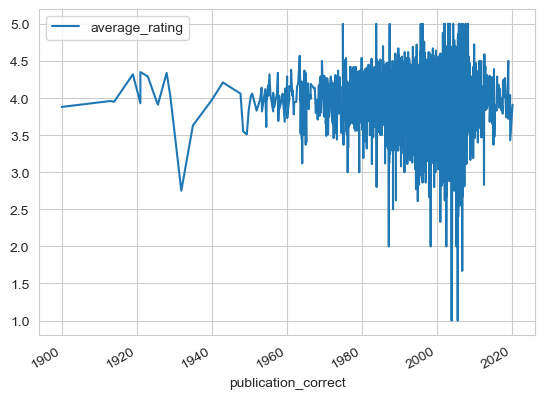

In [57]:
books_df.plot(x="publication_correct", y="average_rating")

In [58]:
#books_df["publication_year"] = books_df["publication_date"].apply(get_datetime_year)
#books_df["publication_year"] = pd.to_datetime(books_df["publication_year"], format="%Y", exact=False)
publication_year=books_df["publication_correct"].dt.year
books_df=books_df.assign(publication_year=publication_year)

<Axes: xlabel='publication_year', ylabel='average_rating'>

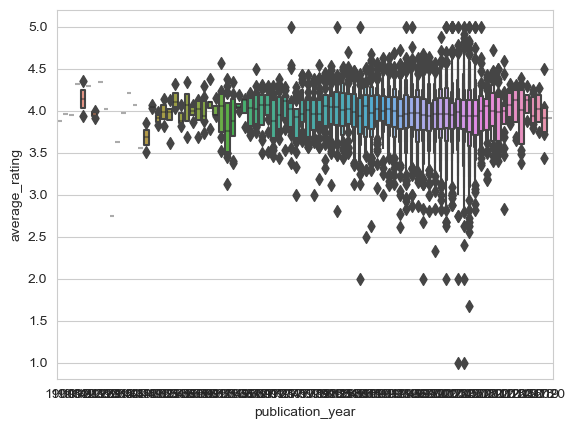

In [59]:
#books_df.plot(x="publication_correct", y="average_rating")
#publication_year.value_counts().plot.bar(grid=True, title="distribution of the year")
#sns.boxenplot(data=books_df, x="publication_correct", y="average_rating")
sns.boxenplot(data=books_df, x="publication_year", y="average_rating")

Overall the year doesn't seem to hide much information, the variations seems to be correlated with the number of publications, as seen below

<Axes: xlabel='publication_correct'>

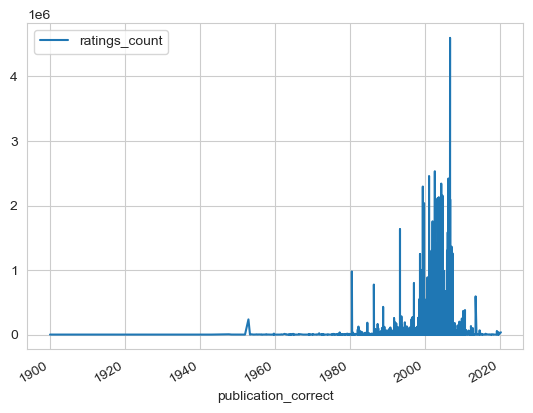

In [60]:
books_df.plot(x="publication_correct", y="ratings_count")

it doesn't seem that the publication year have an important influence on the average_rating values
The noisy-ness seems usually correlated with the number of ratings which makes sense

Since there seems to be peaks, we could eventually investigate months to see if they have information to convey

<Axes: title={'center': 'distribution of the months'}>

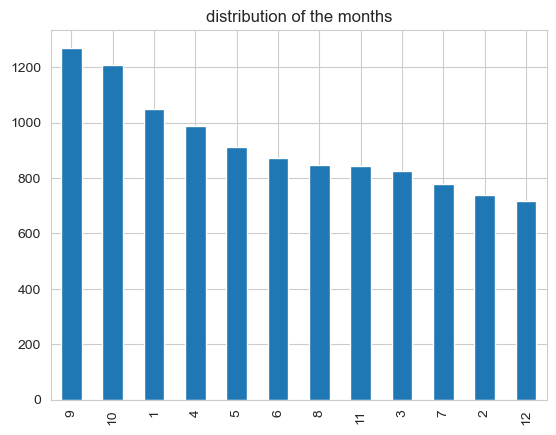

In [61]:
publication_months=books_df["publication_correct"].dt.month
publication_months.value_counts().plot.bar(grid=True, title="distribution of the months")


In [62]:
books_df=books_df.assign(publication_month=publication_months)
books_df['publication_month'] = books_df['publication_month'].astype(int)

<Axes: xlabel='publication_month', ylabel='average_rating'>

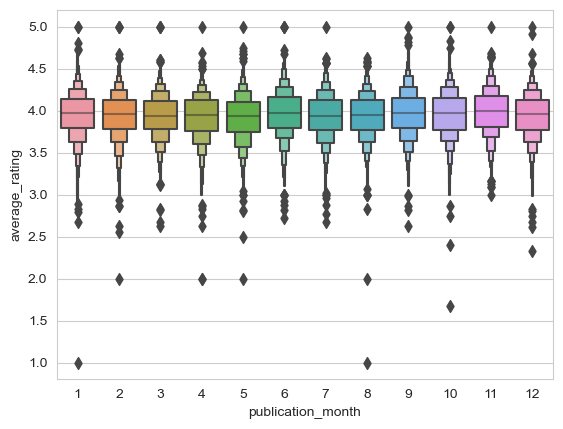

In [63]:
#books_df2.plot(x="publication_month", y="average_rating")
#sns.boxplot(data=books_df2, x="average_rating", y="publication_month")
#books_df2.plot.scatter(
#    y="publication_month", 
#    x="average_rating", 
#    grid=True,
#    title="distribution average_rating / ratings_count"
#)
sns.boxenplot(data=books_df, x="publication_month", y="average_rating")

Judging by the two latest graph, we can see that although some months can have twice as much publications then others (september nearly has double publications compared to december) their distribution of ratings seem to rather similar

The publication_date column can be dropped off although we could potentially use the month as a variable to investigate further

### number of pages

In [64]:
# remove extra whitespaces in column names 
books_df.columns = [col_name.strip() for col_name in books_df.columns]

In [65]:
books_df["num_pages"].describe()

count    11044.000000
mean       336.700833
std        240.948495
min          0.000000
25%        194.000000
50%        300.000000
75%        416.000000
max       6576.000000
Name: num_pages, dtype: float64

<Axes: >

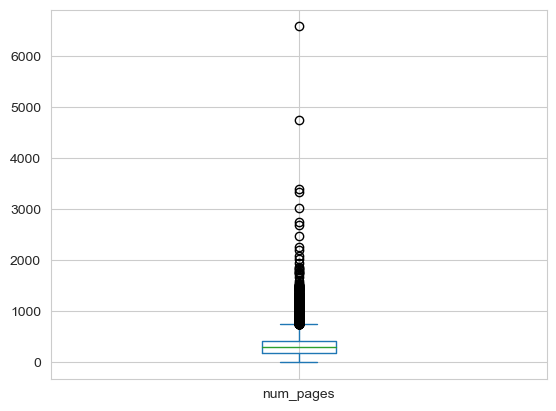

In [66]:
books_df["num_pages"].plot.box()

it might be some outliers but seems ok to have books with more than 3000 pages

<Axes: title={'center': 'distribution average_rating / ratings_count'}, xlabel='average_rating', ylabel='num_pages'>

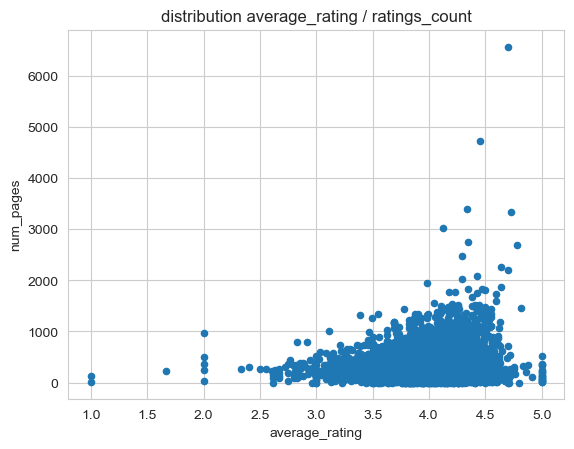

In [67]:
books_df.plot.scatter(
    y="num_pages", 
    x="average_rating", 
    grid=True,
    title="distribution average_rating / ratings_count"
)

In [68]:
books_df_sliced = books_df.loc[books_df["num_pages"] < 2000]

<Axes: title={'center': 'distribution average_rating / ratings_count'}, xlabel='average_rating', ylabel='num_pages'>

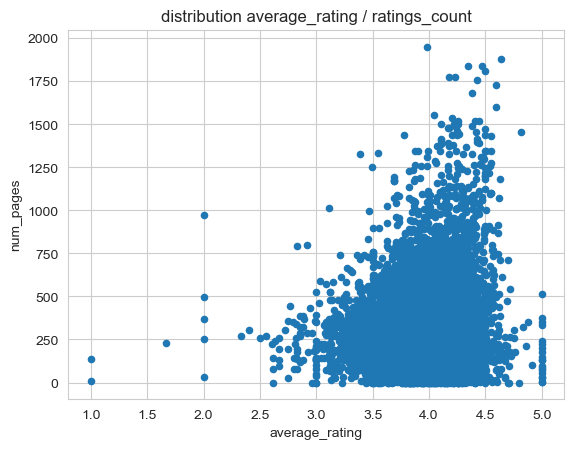

In [69]:
books_df_sliced.plot.scatter(
    y="num_pages", 
    x="average_rating", 
    grid=True,
    title="distribution average_rating / ratings_count"
)

- For books having less than 2000 pages, we find that the more pages the less dispersion of the ratings and well it gets

In [70]:
books_df_sliced["num_pages_cat"] = pd.cut(books_df_sliced["num_pages"], range(0, 2000, 250))

C:\Users\hdela\AppData\Local\Temp\ipykernel_14348\1455063225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_df_sliced["num_pages_cat"] = pd.cut(books_df_sliced["num_pages"], range(0, 2000, 250))


<Axes: xlabel='average_rating', ylabel='num_pages_cat'>

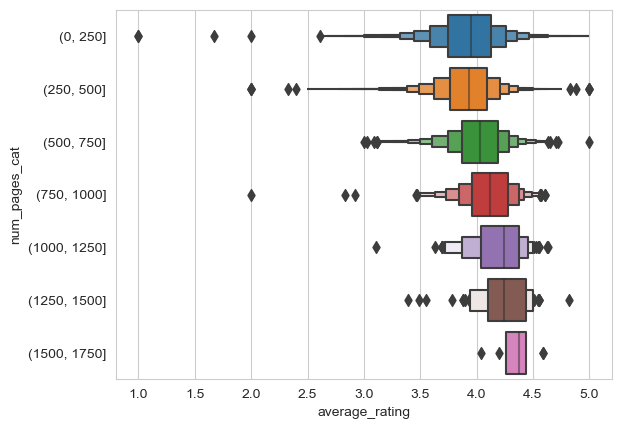

In [71]:
sns.boxenplot(data=books_df_sliced, x="average_rating", y="num_pages_cat")

- the more pages the less distribution and the better average rating

### General notes
- It might be good to include an additional dataset containing more information (like genres, keywords of summary, ...)

### Export clean dataset

In [72]:
books_df.to_csv(path_or_buf="../dataset/books_analysis_output.csv", index=False, encoding="utf-8")

## Conclusion
- Exploring the `books.csv` file, we found interesting behaviors and relations between the different columns and the target  value `average_rating`.
- `titles`: a long text information that can be dropped
- `authors`: an important number of authors. Most of them appear only one time in the dataset. It is not pertinent to use this column as categorical feature (for 2 reasons: very large number of categories and unbalanced dataset regarding the occurrences of authors (only few appears multiple times ))
- `num_pages`: a numerical value that can be used whether raw or categorized and which is directly related to target value
- `ratings_count` and `text_reviews_count`: show a normal distribution regarding the target value. contains some erroneous values but can be kept for predicting model
- `language_code`: is better to dropped because it is very unbalanced
- `publication_year`: can be kept

## ML models

- Let's think of 2 types of ML models:

### 1. Regression
- begin with a linear regression
- then a decision tree regressor
- finally random forest regressor


### 2. Classification
- categorize the average_rating (1-2, 2-3, 3-4, 4-5)
- begin with a logistic regression because it's linear
- decision tree handles very well non linear data
- naive baise maybe


### 3. results
- sklearn.metrics.classification_report gives you a good overview of your data (how is it distributed, ...)

#### To improve the model's score
1. data
2. features
3. model choice
4. model parameters
